# **Import Necessary Libraries**

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing import image


# **Import Dataset and Unzip**

In [ ]:
drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/dataset.zip'

unzip_dir = '/content/dataset'

!mkdir "{unzip_dir}"
!unzip -q "{zip_file_path}" -d "{unzip_dir}"

Mounted at /content/drive


# **Preprocess Dataset**

In [ ]:
# Define folder names and character names mapping
folder_char_mapping = {
    '0': 'া', '1': 'ি', '2': 'ী', '3': 'ু', '4': 'ূ', '5': 'ৃ', '6': 'ে', '7': 'ৈ', '8': 'ো', '9': 'ৌ',
    '10': 'অ', '11': 'আ', '12': 'ই', '13': 'ঈ', '14': 'উ', '15': 'ঊ', '16': 'ঋ', '17': 'এ', '18': 'ঐ',
    '19': 'ও', '20': 'ঔ', '21': 'ক', '22': 'খ', '23': 'গ', '24': 'ঘ', '25': 'ঙ', '26': 'চ', '27': 'ছ',
    '28': 'জ', '29': 'ঝ', '30': 'ঞ', '31': 'ট', '32': 'ঠ', '33': 'ড', '34': 'ঢ', '35': 'ণ', '36': 'ত',
    '37': 'থ', '38': 'দ', '39': 'ধ', '40': 'ন', '41': 'প', '42': 'ফ', '43': 'ব', '44': 'ভ', '45': 'ম',
    '46': 'য', '47': 'র', '48': 'ল', '49': 'শ', '50': 'ষ', '51': 'স', '52': 'হ', '53': 'ড়', '54': 'ঢ়',
    '55': 'য়', '56': 'ৎ', '57': 'ং', '58': 'ঃ', '59': 'ঁ', '60': 'ব্দ', '61': 'ঙ্গ', '62': 'স্ক',
    '63': 'স্ফ', '64': 'চ্ছ', '65': 'স্থ', '66': 'ক্ত', '67': 'স্ন', '68': 'ষ্ণ', '69': 'ম্প',
    '70': 'প্ত', '71': 'ম্ব', '72': 'ত্থ', '73': 'দ্ভ', '74': 'ষ্ঠ', '75': 'ল্প', '76': 'ষ্প',
    '77': 'ন্দ', '78': 'ন্ধ', '79': 'স্ম', '80': 'ণ্ঠ', '81': 'স্ত', '82': 'ষ্ট', '83': 'ন্ম',
    '84': 'ত্ত', '85': 'ঙ্খ', '86': 'ত্ন', '87': 'ন্ড', '88': 'জ্ঞ', '89': 'ড্ড', '90': 'ক্ষ',
    '91': 'দ্ব', '92': 'চ্চ', '93': 'ক্র', '94': 'দ্দ', '95': 'জ্জ', '96': 'ক্ক', '97': 'ন্ত',
    '98': 'ক্ট', '99': 'ঞ্চ', '100': 'ট্ট', '101': 'শ্চ', '102': 'ক্স', '103': 'জ্ব', '104': 'ঞ্জ',
    '105': 'দ্ধ', '106': 'ন্ন', '107': 'ঘ্ন', '108': 'ক্ল', '109': 'হ্ন', '110': 'স্প', '111': 'ল্ত',
    '112': '০', '113': '১', '114': '২', '115': '৩', '116': '৪', '117': '৫', '118': '৬', '119': '৭',
    '120': '৮', '121': '৯',
}

# Load images from each folder
dataset_path = '/content/dataset/dataset'
data = []
labels = []

for folder_name, char_name in folder_char_mapping.items():
    folder_path = os.path.join(dataset_path, folder_name)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = np.array(image.resize((28, 28)))     # Resize to 28x28px
        data.append(image)
        labels.append(char_name)

# Convert to NumPy Arrays
data = np.array(data)
labels = np.array(labels)

# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data Normalization
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape Data
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


# **Check and Visualize Preprocessed Data**

In [ ]:
# Check shape of data and labels
print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

# Class distribution
unique_classes, class_counts = np.unique(labels, return_counts=True)
print("Number of classes:", len(unique_classes))
print("Class distribution:")
for cls, count in zip(unique_classes, class_counts):
   print(f"Class {cls}: {count} samples")

# Confirm normalization
print("Minimum pixel value:", np.min(data))
print("Maximum pixel value:", np.max(data))

Shape of data: (367018, 28, 28)
Shape of labels: (367018,)
Number of classes: 122
Class distribution:
Class ঁ: 3056 samples
Class ং: 3084 samples
Class ঃ: 3081 samples
Class অ: 3065 samples
Class আ: 3074 samples
Class ই: 3083 samples
Class ঈ: 3077 samples
Class উ: 3354 samples
Class ঊ: 2806 samples
Class ঋ: 3077 samples
Class এ: 3079 samples
Class ঐ: 3085 samples
Class ও: 3090 samples
Class ঔ: 3084 samples
Class ক: 3077 samples
Class ক্ক: 3052 samples
Class ক্ট: 3045 samples
Class ক্ত: 3051 samples
Class ক্র: 2921 samples
Class ক্ল: 3052 samples
Class ক্ষ: 3075 samples
Class ক্স: 3070 samples
Class খ: 3078 samples
Class গ: 3077 samples
Class ঘ: 3062 samples
Class ঘ্ন: 2841 samples
Class ঙ: 3078 samples
Class ঙ্খ: 3067 samples
Class ঙ্গ: 3040 samples
Class চ: 3074 samples
Class চ্চ: 3061 samples
Class চ্ছ: 3044 samples
Class ছ: 3070 samples
Class জ: 3069 samples
Class জ্জ: 3060 samples
Class জ্ঞ: 3061 samples
Class জ্ব: 3069 samples
Class ঝ: 3083 samples
Class ঞ: 3104 samples
Class ঞ্চ:

# **LeNet-5**

In [ ]:
tf.keras.backend.clear_session()

def lenet5(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) # layer 1: convolutional layer
    model.add(MaxPooling2D(pool_size=(2, 2))) # Layer 2: Average pooling layer
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu')) # Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2))) # Layer 4
    model.add(Flatten()) # Flatten the output
    model.add(Dense(units=120, activation='relu')) # Layer 5: Fully connected layer with 120 neurons
    model.add(Dense(units=84, activation='relu')) # Layer 6: Fully connected layer with 84 neurons
    model.add(Dense(units=num_classes, activation='softmax')) # Output Layer
    return model

input_shape = (28, 28, 1)  # Input shape for 28x28 grayscale images
num_classes = len(unique_classes)  # Number of unique classes

# Build the model
lenet5_model = lenet5(input_shape, num_classes)

# Compile the model with categorical_crossentropy loss function
lenet5_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
lenet5_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

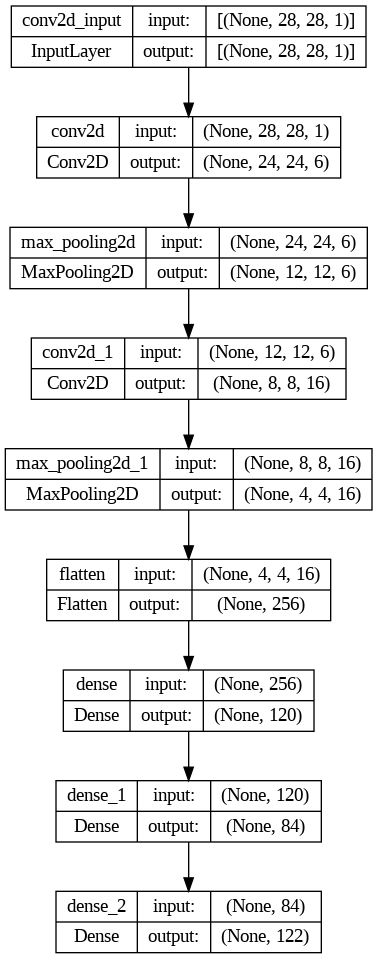

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot LeNet-5 model
plot_model(lenet5_model, to_file='lenet5.png', show_shapes=True)


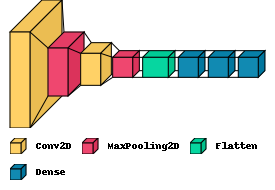

In [ ]:
!pip install visualkeras

import visualkeras

visualkeras.layered_view(lenet5_model, legend=True)


In [ ]:
from keras.utils import to_categorical

# Create a mapping from Bangla characters to integers
char_to_int = {char: i for i, char in enumerate(unique_classes)}

# Convert Bangla characters to integers
y_train_int = [char_to_int[char] for char in y_train]
y_val_int = [char_to_int[char] for char in y_val]

# One-hot encode the integer labels
y_train_encoded = to_categorical(y_train_int, num_classes=len(unique_classes))
y_val_encoded = to_categorical(y_val_int, num_classes=len(unique_classes))


In [ ]:
# Train the model
history = lenet5_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    batch_size=32,
    epochs=10,
    verbose=1
)

Epoch 1/10
8029/8029 [==============================] - 43s 5ms/step - loss: 1.2892 - accuracy: 0.6685 - val_loss: 0.7922 - val_accuracy: 0.7842
Epoch 2/10
8029/8029 [==============================] - 38s 5ms/step - loss: 0.7069 - accuracy: 0.8068 - val_loss: 0.6509 - val_accuracy: 0.8216
Epoch 3/10
8029/8029 [==============================] - 39s 5ms/step - loss: 0.5989 - accuracy: 0.8341 - val_loss: 0.5995 - val_accuracy: 0.8332
Epoch 4/10
8029/8029 [==============================] - 39s 5ms/step - loss: 0.5462 - accuracy: 0.8491 - val_loss: 0.5572 - val_accuracy: 0.8480
Epoch 5/10
8029/8029 [==============================] - 38s 5ms/step - loss: 0.5093 - accuracy: 0.8581 - val_loss: 0.5327 - val_accuracy: 0.8519
Epoch 6/10
8029/8029 [==============================] - 38s 5ms/step - loss: 0.4851 - accuracy: 0.8645 - val_loss: 0.5417 - val_accuracy: 0.8531
Epoch 7/10
8029/8029 [==============================] - 37s 5ms/step - loss: 0.4678 - accuracy: 0.8694 - val_loss: 0.5252 - val_ac

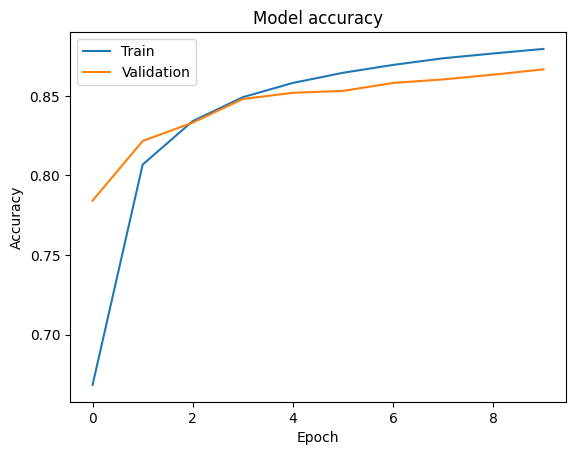

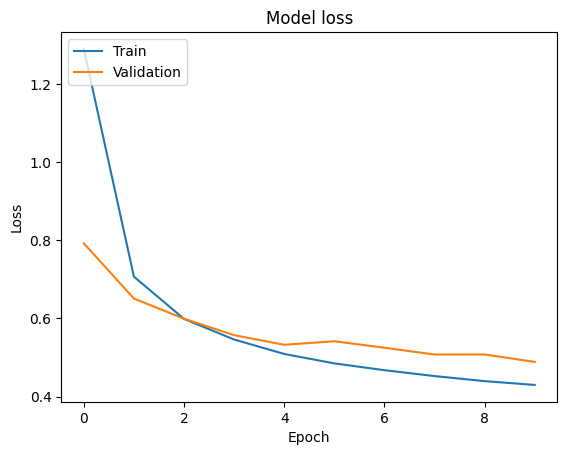

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Convert Bangla characters to integers for test labels
y_test_int = [char_to_int[char] for char in y_test]

# One-hot encode the integer test labels
y_test_encoded = to_categorical(y_test_int, num_classes=len(unique_classes))

# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet5_model.evaluate(X_test, y_test_encoded)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1721/1721 [==============================] - 4s 2ms/step - loss: 0.4950 - accuracy: 0.8677
Test Loss: 0.4950433373451233
Test Accuracy: 0.8677274584770203


# **Save and Convert**

In [ ]:
from tensorflow.keras.models import load_model

lenet5_model.save('bornobyte.keras')

loaded_model = load_model('bornobyte.keras')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('bornobyte.tflite', 'wb') as f:
    f.write(tflite_model)

# Save the Keras model to Google Drive
lenet5_model.save('/content/drive/MyDrive/bornobyte.keras')

# Save the TensorFlow Lite model to Google Drive
with open('/content/drive/MyDrive/bornobyte.tflite', 'wb') as f:
    f.write(tflite_model)

# **Test**

In [ ]:
# Upload the image file
uploaded = files.upload()

# Retrieve the uploaded image file name
uploaded_image_path = next(iter(uploaded))

# Load the uploaded image
uploaded_image = image.load_img(uploaded_image_path, target_size=(28, 28), color_mode="grayscale")

# Convert the image to a numpy array
uploaded_image_array = image.img_to_array(uploaded_image)
uploaded_image_array = np.expand_dims(uploaded_image_array, axis=0)

uploaded_image_array = uploaded_image_array.astype('float32') / 255.0

# Predict the character
predicted_probabilities = lenet5_model.predict(uploaded_image_array)
predicted_character_index = np.argmax(predicted_probabilities)
predicted_character = unique_classes[predicted_character_index]

# Display the predicted character
print("Predicted Character:", predicted_character)


Saving 1_SHIR_12_1_307.jpg to 1_SHIR_12_1_307 (1).jpg
1/1 [==============================] - 0s 18ms/step
Predicted Character: ম্প


# Visualization

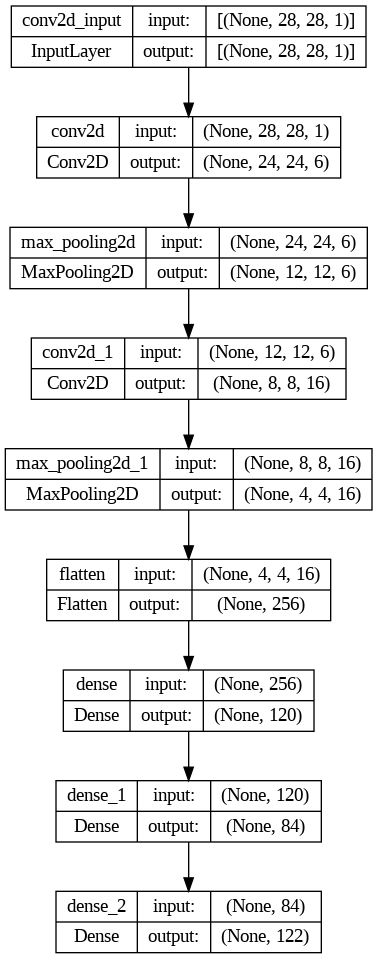

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image file
plot_model(lenet5_model, to_file='lenet5_model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture
from IPython.display import Image
Image('lenet5_model.png')


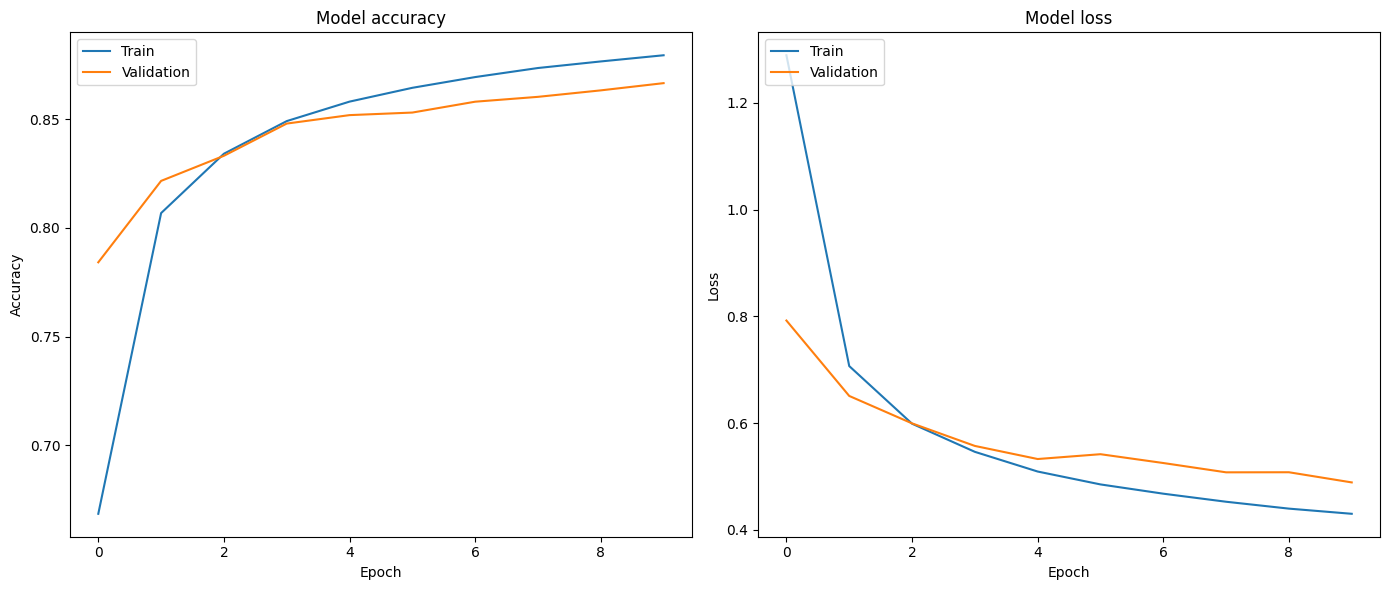

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


1721/1721 [==============================] - 5s 3ms/step


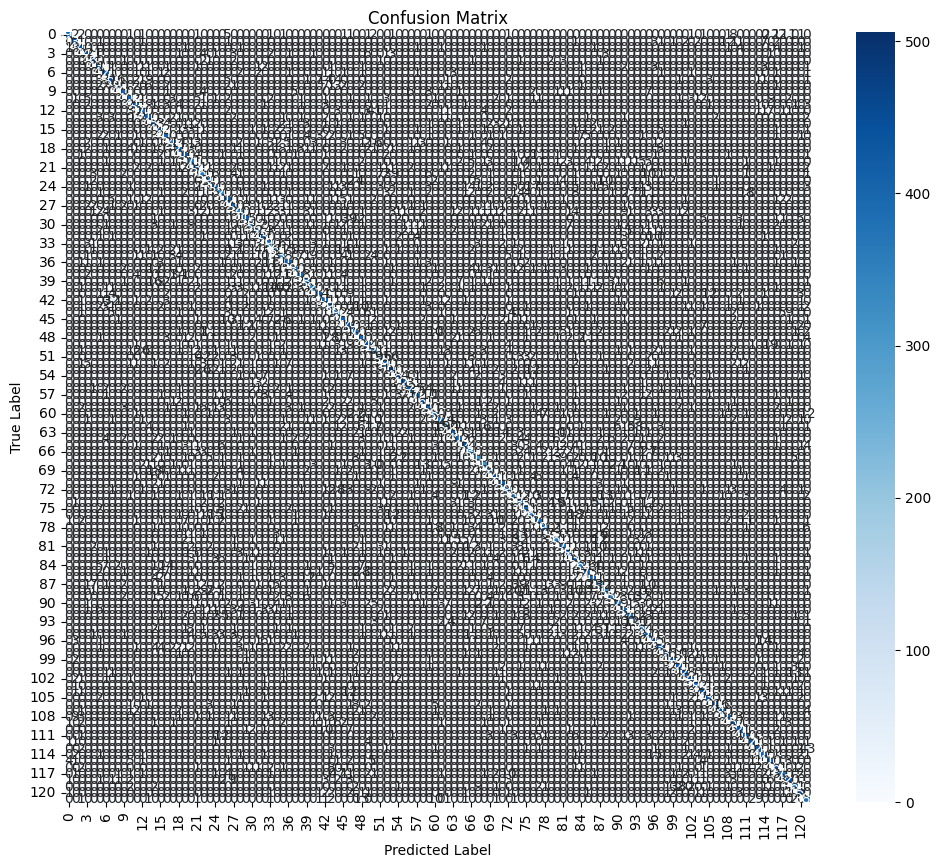

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes on the test dataset
y_pred = lenet5_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# VGGNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define VGGNet architecture
def vggnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 122

# Build VGGNet model
vggnet_model = vggnet(input_shape, num_classes)

# Compile the model
vggnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
vggnet_model.summary()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Train the model
history_vggnet = vggnet_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model on test set
test_loss, test_acc = vggnet_model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_acc}')


In [ ]:
# Plot training history
plt.plot(history_vggnet.history['accuracy'], label='accuracy')
plt.plot(history_vggnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Learning Rate Schedule
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 15:
        lr *= 0.5
    elif epoch > 10:
        lr *= 0.75
    elif epoch > 5:
        lr *= 0.9
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model Simplification
def simple_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 122

# Build simple model
simple_model = simple_model(input_shape, num_classes)

# Compile the model
simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and learning rate schedule
history = simple_model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32),
                            steps_per_epoch=len(X_train) / 32,
                            epochs=20,
                            validation_data=(X_val, y_val_encoded),
                            callbacks=[lr_scheduler])

# Evaluate the model on test set
test_loss, test_acc = simple_model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_acc}')


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# AlexNet

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

def create_modified_alexnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create modified AlexNet model
modified_alexnet_model = create_modified_alexnet(input_shape, num_classes)

# Compile the model
modified_alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = modified_alexnet_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model
test_loss, test_accuracy = modified_alexnet_model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_accuracy)



In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

